<a href="https://colab.research.google.com/github/Marchbreeze/KU-Data-Science/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. K-means 실습

In [7]:
# 알고리즘 수행을 위해 필요한 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

plt.figure(figsize = (10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [8]:
# 데이터프레임 불러오기
df = pd.read_csv('menu.csv', engine = 'python')
df

,제품명,가격,판매량
0,밀크티,7000,40408
1,파인애플요거트,7800,45969
2,망고요거트,5300,42964
3,카페라떼,4700,52165
4,버블밀크티,5200,55531
5,아메리카노,6300,75981
6,녹차,4700,77162
7,카라멜마끼아또,6200,85488
8,에스프레소,4700,47178
9,홍차,6600,53043


In [13]:
# K-means Clustering의 실제

df_data = df[['가격', '판매량']]
km = KMeans(n_clusters = 4, random_state = 0)
km.fit(df_data)
result = km.predict(df_data)
result

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 2, 2, 1, 1, 3, 0, 2, 0, 3, 3, 2, 3, 2, 3, 2, 1, 3, 2, 1,
       0, 0], dtype=int32)

In [10]:
# 군집의 중심 위치를 출력
km.cluster_centers_

array([[ 6471.42857143, 43697.85714286],
       [ 6275.        , 73505.5       ],
       [ 6085.71428571, 55502.57142857],
       [ 5316.66666667, 82752.83333333]])

In [11]:
# 할당 결과를 DataFrame에 추가
df['CLUSTER'] = result

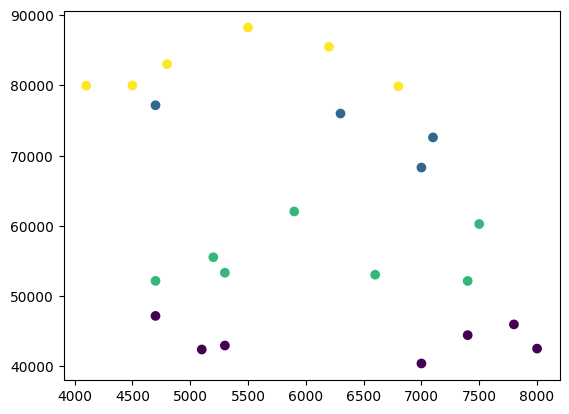

In [12]:
# 산점도로 시각화
plt.scatter(df['가격'], df['판매량'], c = df['CLUSTER'])
plt.show()

## 2. DBSCAN 실습

In [14]:
# 군집화 및 시각화를 위한 라이브러리
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [16]:
# 데이터프레임 불러오기
df = pd.read_csv('housing.csv')
house_position = df[['x', 'y']]
house_position

,x,y
0,57.18,41.83
1,61.40,68.26
2,27.04,75.01
3,73.63,81.01
4,52.13,17.67
5,53.45,52.44
6,73.26,36.74
7,22.44,67.12
8,67.31,37.13
9,18.08,63.70


In [17]:
# 모수 결정 및 DBSCAN 군집화 수행
db = DBSCAN(eps = 10, min_samples = 3)
cluster_pred = db.fit_predict(house_position)

In [19]:
# 원본 데이터가 어떤 군집에 속하게 되었는지 확인
df['CLUSTER'] = cluster_pred
cluster_pred

array([ 2,  0,  1,  0, -1,  0,  2,  1,  2,  1,  0,  1, -1, -1,  1,  1, -1,
        0,  0,  0,  0,  1,  0,  1, -1,  2, -1,  2,  0,  0])

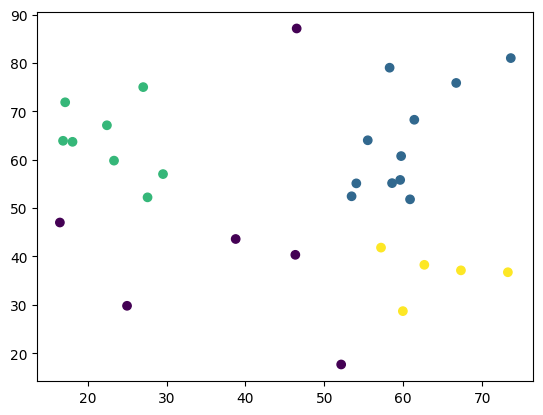

In [20]:
# 군집화 결과 시각화
x = house_position['x']
y = house_position['y']
plt.scatter(x, y, c = cluster_pred)

## 3. Dendrogram 실습

In [21]:
# 계층적 군집화 및 시각화를 위한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [60.0, 60.0, 83.75, 83.75],
  [45.0, 45.0, 71.875, 71.875],
  [35.0, 35.0, 58.4375, 58.4375],
  [25.0, 25.0, 46.71875, 46.71875],
  [125.0, 125.0, 135.0, 135.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [165.0, 165.0, 191.25, 191.25],
  [155.0, 155.0, 178.125, 178.125],
  [145.0, 145.0, 166.5625, 166.5625],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [155.78125, 155.78125, 232.5, 232.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [255.0, 255.0, 273.75, 273.75],
  [194.140625, 194.140625, 264.375, 264.375],
  [130.0, 130.0, 229.2578125, 229.2578125],
  [115.0, 115.0, 179.62890625, 179.62890625],
  [35.859375, 35.859375, 147.314453125, 147.314453125],
  [15.0, 15.0, 91.5869140625, 91.5869140625],
  

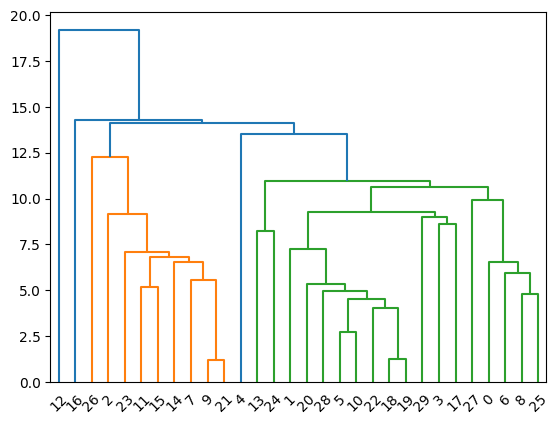

In [22]:
# 데이터 불러오고 계층적 군집화 수행
df = pd.read_csv('housing.csv')
house_position = df[['x', 'y']]

linked = linkage(house_position, 'single')
dendrogram(linked, orientation = 'top')
